In [2]:
import sys
sys.path += ["/home/yousuf/workspace/dissertation/code/rPPG/python/core"]

In [3]:
from region_selection import BayesianSkinDetector
import helper

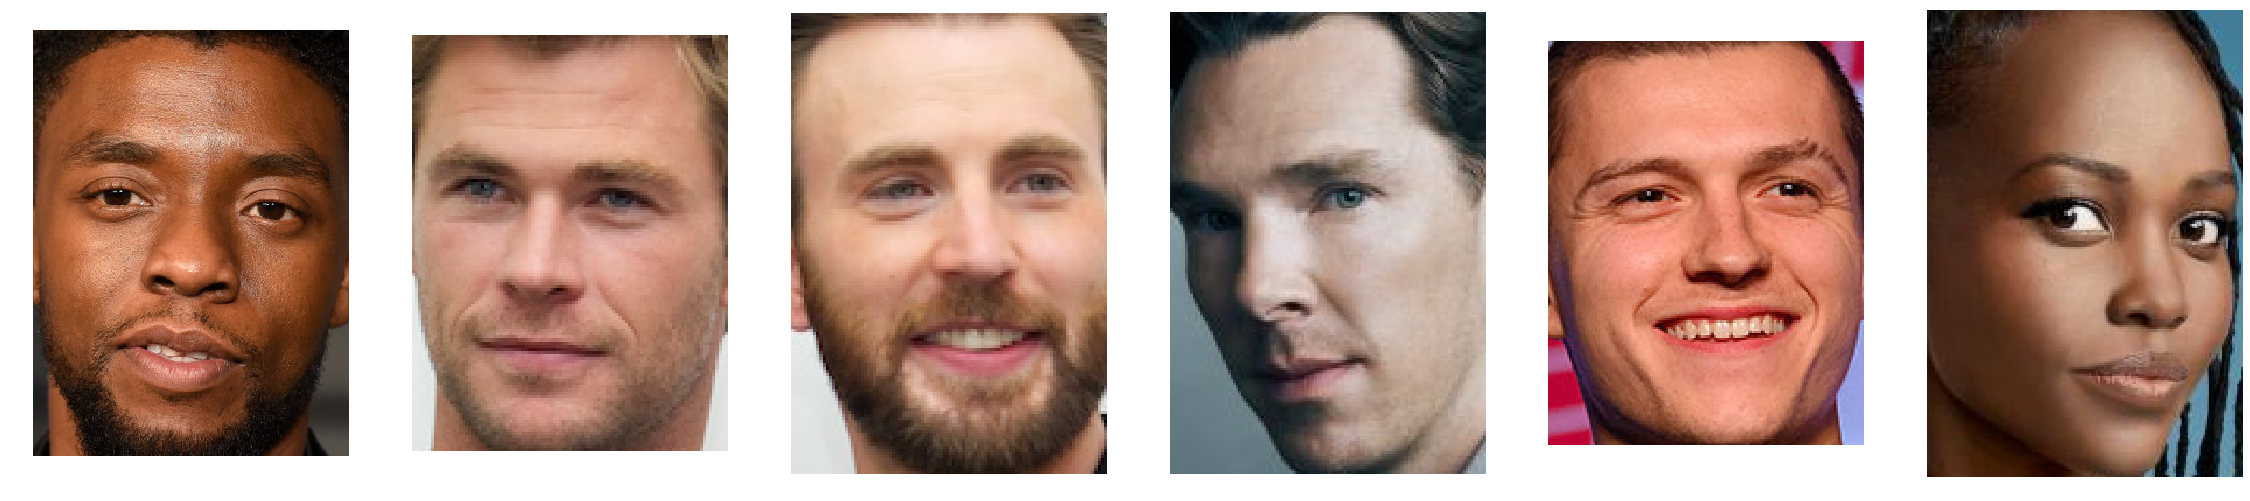

In [4]:
images = helper.get_cropped_test_images()
helper.show_images_plt(images)

In [5]:
heatmaps = [BayesianSkinDetector(skin_std=40, non_skin_std=150).detect(i) for i in images]

Frame: 0, time to find skin tone: 2.1380674839019775
Image shape: (366, 271, 2)
Finding distance matrix: 0.0059583187103271484
Vectorized pdf: 0.01599264144897461
Time to find class conditional 0.022710800170898438
Time to find prior 0.0018143653869628906
Time to update lookup 0.002787351608276367
Frame: 0, time to find skin tone: 0.20084619522094727
Image shape: (133, 101, 2)
Finding distance matrix: 0.0007457733154296875
Vectorized pdf: 0.0015108585357666016
Time to find class conditional 0.0024416446685791016
Time to find prior 0.0004229545593261719
Time to update lookup 0.0002243518829345703
Frame: 0, time to find skin tone: 0.23037028312683105
Image shape: (146, 100, 2)
Finding distance matrix: 0.001783609390258789
Vectorized pdf: 0.0064144134521484375
Time to find class conditional 0.008742570877075195
Time to find prior 0.0007617473602294922
Time to update lookup 0.00014328956604003906
Frame: 0, time to find skin tone: 0.3249201774597168
Image shape: (183, 125, 2)
Finding distan

Skin posterior


/usr/lib/python3/dist-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


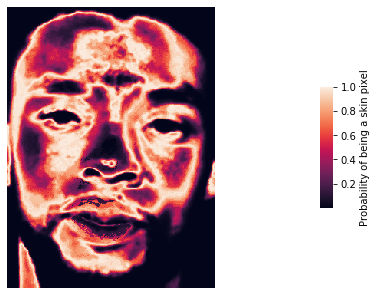

Mask above mean


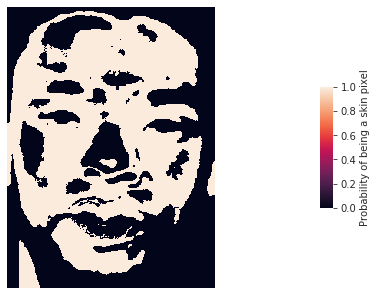

Top 70% of values


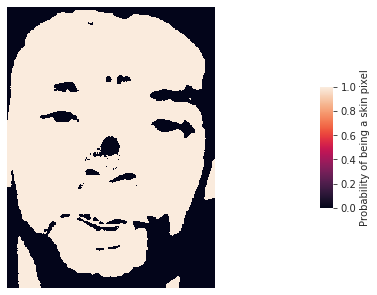

Top 80% of values


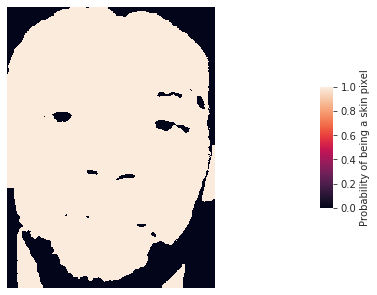

Mean value
[ 60.82320866  93.85261085 158.63766661]
Skin posterior


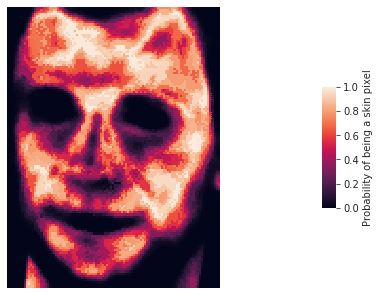

Mask above mean


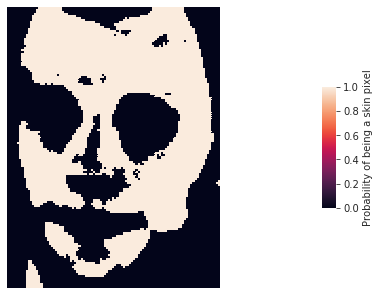

Top 70% of values


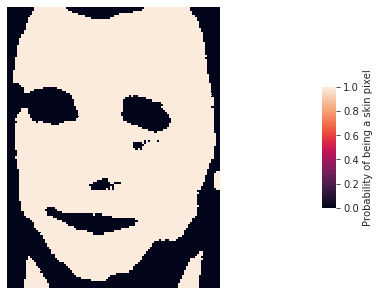

Top 80% of values


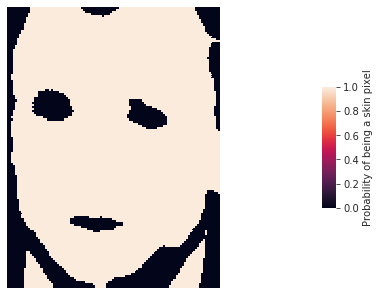

Mean value
[120.33048236 142.80611399 196.73407687]
Skin posterior


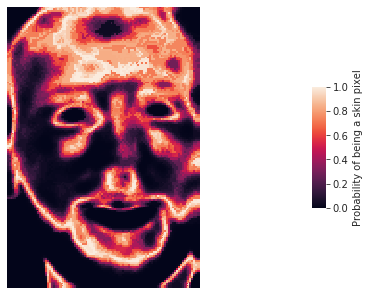

Mask above mean


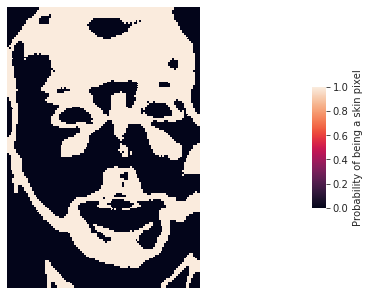

Top 70% of values


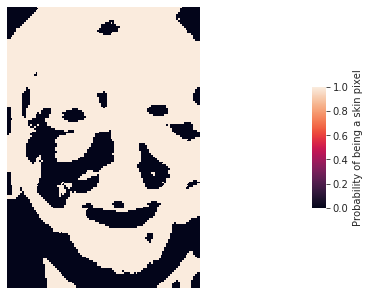

Top 80% of values


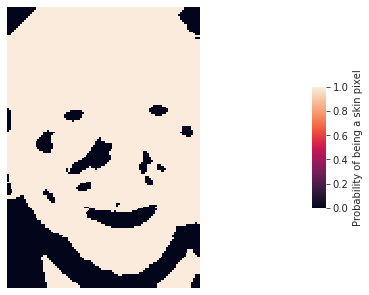

Mean value
[129.04133052 151.12924752 191.68560451]
Skin posterior


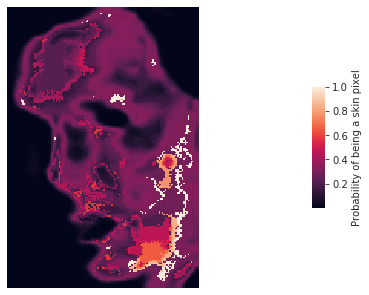

Mask above mean


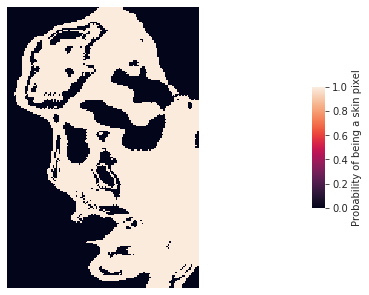

Top 70% of values


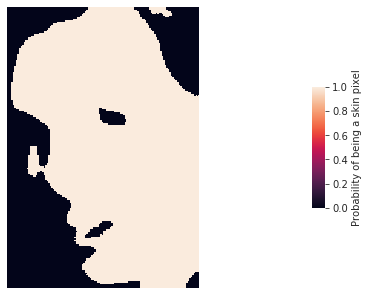

Top 80% of values


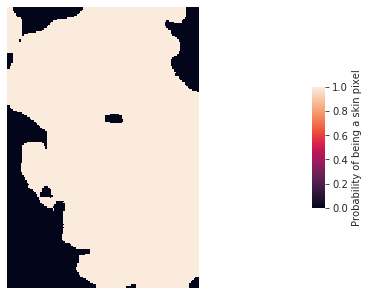

Mean value
[145.05480067 157.14705311 178.98269579]
Skin posterior


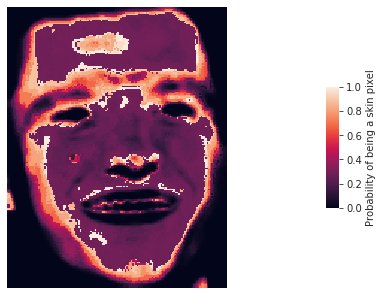

Mask above mean


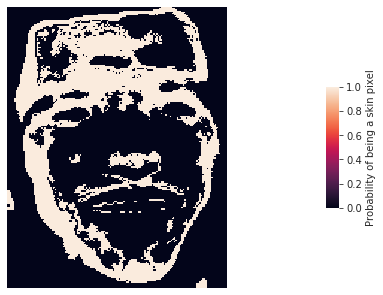

Top 70% of values


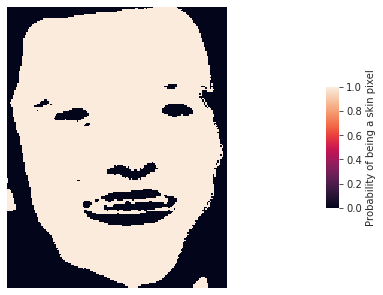

Top 80% of values


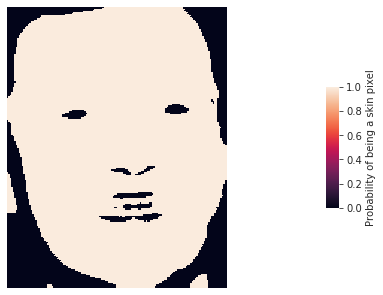

Mean value
[102.8151417  128.99899621 208.24217001]
Skin posterior


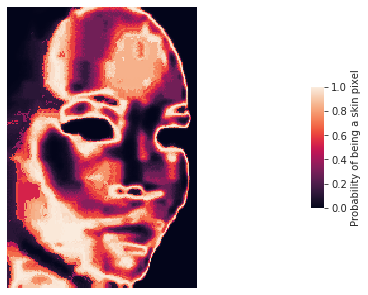

Mask above mean


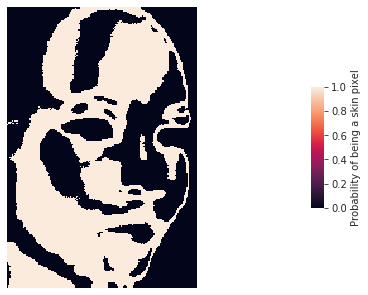

Top 70% of values


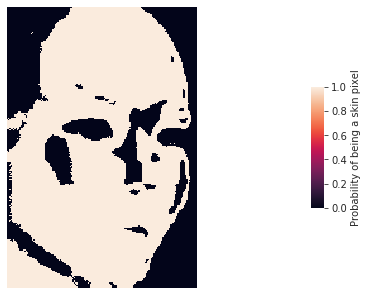

Top 80% of values


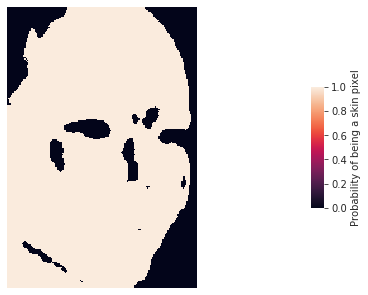

Mean value
[ 68.91763243  89.78260597 128.30477222]


In [6]:
import numpy as np
for t in heatmaps:
    x,v= t
#     print(x)
#     print(y)
    print("Skin posterior")
    helper.display_heatmap([x])
#     print("Not skin posterior")
#     helper.display_heatmap([y])
#     print(z)
    print("Mask above mean")
    helper.display_heatmap([x>np.mean(x)])
    print("Top 70% of values")
    helper.display_heatmap([x>np.percentile(x, 30)])
    print("Top 80% of values")
    helper.display_heatmap([x>np.percentile(x, 20)])
    print("Mean value")
    print(v)


In [4]:
import numpy as np
lookup = np.array([
    [1,3],[2,4]
])
image = np.array([
    [[0,1],[1,0]],
    [[1,1],[0,0]]
])
print(lookup.shape)
print(image.shape)
lookup[image[:,:,0],image[:,:,1]]

(2, 2)
(2, 2, 2)


array([[3, 2],
       [4, 1]])

In [ ]:
import matplotlib
import matplotlib.cm as cm
cmap = cm.get_cmap('RdBu')

In [ ]:
list(map(cmap, [0,0.5, 0.6]))

In [ ]:
import numpy as np
distribution = np.array([[0.1, 0.4],[0.5, 0]])
image = np.array([[[10,10,10],[20,20,20]],[[100,100,100], [10000,10000,10000]]])
print(np.sum(image[:,:,0]*distribution))
# np.broadcast(distribution,image)

In [ ]:
import region_selection
region_selection.weighted_mean(image, distribution)

In [ ]:
distribution = np.array([[1, 0],[1, 0]])
region_selection.weighted_mean(image, distribution)

In [2]:
import pipeline
from configuration import Configuration
from face_det import KLTBoxingWithThresholding, DNNDetector
from region_selection import BayesianSkinDetector
from hr_isolator import ICAProcessor

config = Configuration(KLTBoxingWithThresholding(DNNDetector()),  BayesianSkinDetector(), ICAProcessor(), 1200, 60)
results = pipeline.tracking_pipeline("test-face-detection-videos/mov-1.mp4",config,display=True)

Frame: 0, time to find skin tone: 3.111698865890503
Frame: 1200, time to find skin tone: 3.055420398712158
N: 1, Frame number: 1260
N: 2, Frame number: 1320
N: 3, Frame number: 1380
N: 4, Frame number: 1440
N: 5, Frame number: 1500
N: 6, Frame number: 1560


/home/yousuf/.local/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


N: 7, Frame number: 1620
N: 8, Frame number: 1680
N: 9, Frame number: 1740
Total times: tracking 42.65981841087341s, ROI 82.12916111946106s, display 1541.7399921417236s, ICA 1.5645039081573486s, read 11.57369065284729
Average per frame: tracking 0.02387231024671148s, ROI 0.04595923957440462s, display 0.8627532132857995s, ICA 0.0008754918344473132s, reading video 0.006476603610994567
Frames per second: tracking 41.88953602166571, ROI 21.75841047981383, display 1.1590800064267457, ICA 1142.2151077300307, reading video 154.40191496395084
Number of frames: 1787


In [2]:
results

([array([ 91.97485762, 100.15669698, 136.94056895]),
  array([ 93.55948986, 102.00389206, 139.01260831]),
  array([ 93.63456768, 102.16239357, 139.21897127]),
  array([ 93.6959145 , 102.27375058, 139.40046964]),
  array([ 93.63741999, 102.13823409, 139.31329668]),
  array([ 93.93572229, 102.33052321, 139.572235  ]),
  array([ 94.17888738, 102.67096259, 139.92317742]),
  array([ 94.13014969, 102.62923412, 139.88105226]),
  array([ 94.09160959, 102.56512637, 139.91832684]),
  array([ 93.94699804, 102.48090136, 139.90671077]),
  array([ 93.62907024, 102.2030541 , 139.62435472]),
  array([ 93.58195533, 102.23600269, 139.7327943 ]),
  array([ 93.84812971, 102.33264976, 139.70891488]),
  array([ 94.0015619 , 102.55233786, 139.97968201]),
  array([ 93.82541977, 102.51984248, 139.93787524]),
  array([ 93.58579404, 103.17510539, 144.44036822]),
  array([ 98.92703104, 109.15889653, 158.69121479]),
  array([102.43579324, 111.51231551, 155.44324086]),
  array([ 92.3014886 , 101.28305712, 143.67459

In [1]:
import numpy as np
import cv2 as cv
import matplotlib
import matplotlib.cm as cm
def display(frame, faces, area_of_interest):
    height, width, _ = frame.shape
    x,y,w,h = faces[0]
#     cmap = cm.get_cmap('RdYlGn')
#     cmap = cm.get_cmap('cool')
#     cmap = cm.get_cmap('jet')
    cmap = cm.get_cmap('ocean')
    print("Area of interest")
    print(area_of_interest)

    area_of_interest = np.pad(area_of_interest, ((y,height-(y+h)),(x,width-(x+w))), 'constant', constant_values=0)
    mask_of_roi = np.pad(np.ones(shape=(h,w)), ((y,height-(y+h)),(x,width-(x+w))), 'constant', constant_values=0)
    h,w = area_of_interest.shape
    rectangle = 255*np.array(list(map(cmap, area_of_interest)))
    rectangle = rectangle.reshape((h,w,4))
    mask_of_roi = np.repeat(mask_of_roi[:, :, np.newaxis], 3, axis=2)

    # Overlay the points being considered and the rectangle of the face
    # rectangle = np.full(shape=(height,width,3), fill_value=[0,255,0], dtype=np.uint8)
    rectangle = rectangle[:,:,:3]
    # Need to take and with one vector since otherwise we get 254 instead of the desired value of 0 at each point outside the mask
    # i.e. NOT(0000 0001) = 1111 1110 rather than 0
    # mask_of_roi = cv.bitwise_and(cv.bitwise_not(area_of_interest), np.ones(shape=(height,width,3), dtype=np.uint8))
    alpha = 0.8
    foreground = rectangle.astype(float)
    background = frame.astype(float)
    mask_of_roi = mask_of_roi.astype(float)/2
    # print(mask_of_roi.shape)
    # print(rectangle.shape)
    foreground = cv.multiply(mask_of_roi, foreground)
    background = cv.multiply(1.0-mask_of_roi, background)
    blended = cv.addWeighted(foreground, alpha, background, 1, 0)
    return rectangle, foreground, background, blended
    # self.out.write(np.uint8(blended))

In [1]:
from visualisation import Visualiser
from face_det import DNNDetector
from face_det import KLTBoxingWithThresholding, DNNDetector
from region_selection import BayesianSkinDetector
from hr_isolator import ICAProcessor
from region_selection import BayesianSkinDetector
import numpy as np
import helper
im = helper.get_test_images()[0]
cr = helper.get_cropped_test_images()[0]
hmap, value = BayesianSkinDetector(skin_std=40, non_skin_std=150).detect(cr) 
print(f"NEW MAX: {np.max(hmap)}")
x = display(im, DNNDetector().detect_face(im), hmap)
x = [np.array(x[i], dtype=np.uint8) for i in range(4)]
helper.show_images_plt(x)

KeyboardInterrupt: 